In [32]:
!pip install pandas numpy matplotlib seaborn scikit-learn pydotplus 

Defaulting to user installation because normal site-packages is not writeable


In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pydotplus
import graphviz
print(graphviz.__version__)

# load the dataset
df = pd.read_csv('bank-additional-full.csv', sep = ';')

# View the first few rows
df.head()

0.21


age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [138]:
df.info()
df.describe()
df['y'].value_counts()  # Target variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

y
no     36548
yes     4640
Name: count, dtype: int64

In [140]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [142]:
# convert categorical columns using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  month_nov  month_oct  \
0          -36.4      4.857       5191.0  ...      False      False   
1          -36.4      4.857       5191.0  ...      False      False   
2          -36.4      4.857       5191.0  ...      False      False   
3          -36.4      4.857       5191.0  ...      False      False   
4          -36.4      4.857       5191.0  ...      False      False   

   month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0      False             True            False            False   
1      False             True            False            False   
2      False             True            False            False   
3      False             True            False            False   
4      False             True            False            False   

   day_of_week_wed  poutcome_nonexistent  poutcome_success  y_yes  
0            False                  True             False  False  
1            False                  True             False  False  
2            False                  True             False  False  
3            False                  True             False  False  
4            False                  True             False  False  

[5 rows x 54 columns]

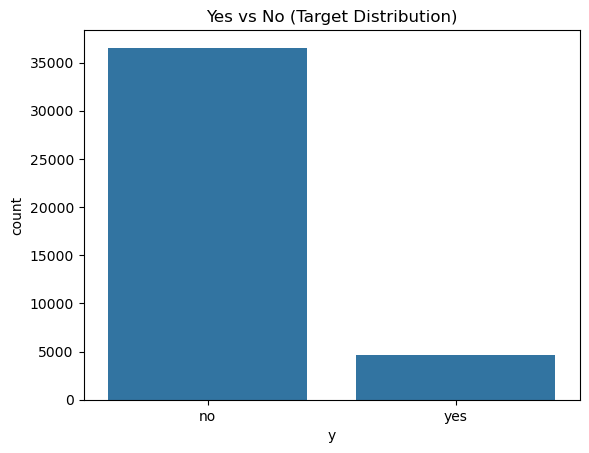

In [144]:
# data exploration
sns.countplot(x='y', data=df)
plt.title('Yes vs No (Target Distribution)')
plt.show()

In [146]:
# Features and target
X = df_encoded.drop('y_yes', axis=1)  # 'y_yes' is the column after encoding 'y'
y = df_encoded['y_yes']  # 1 = subscribed, 0 = not subscribed

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [150]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8868657441126487
Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.93      0.94      7303
        True       0.50      0.52      0.51       935

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.72      8238
weighted avg       0.89      0.89      0.89      8238



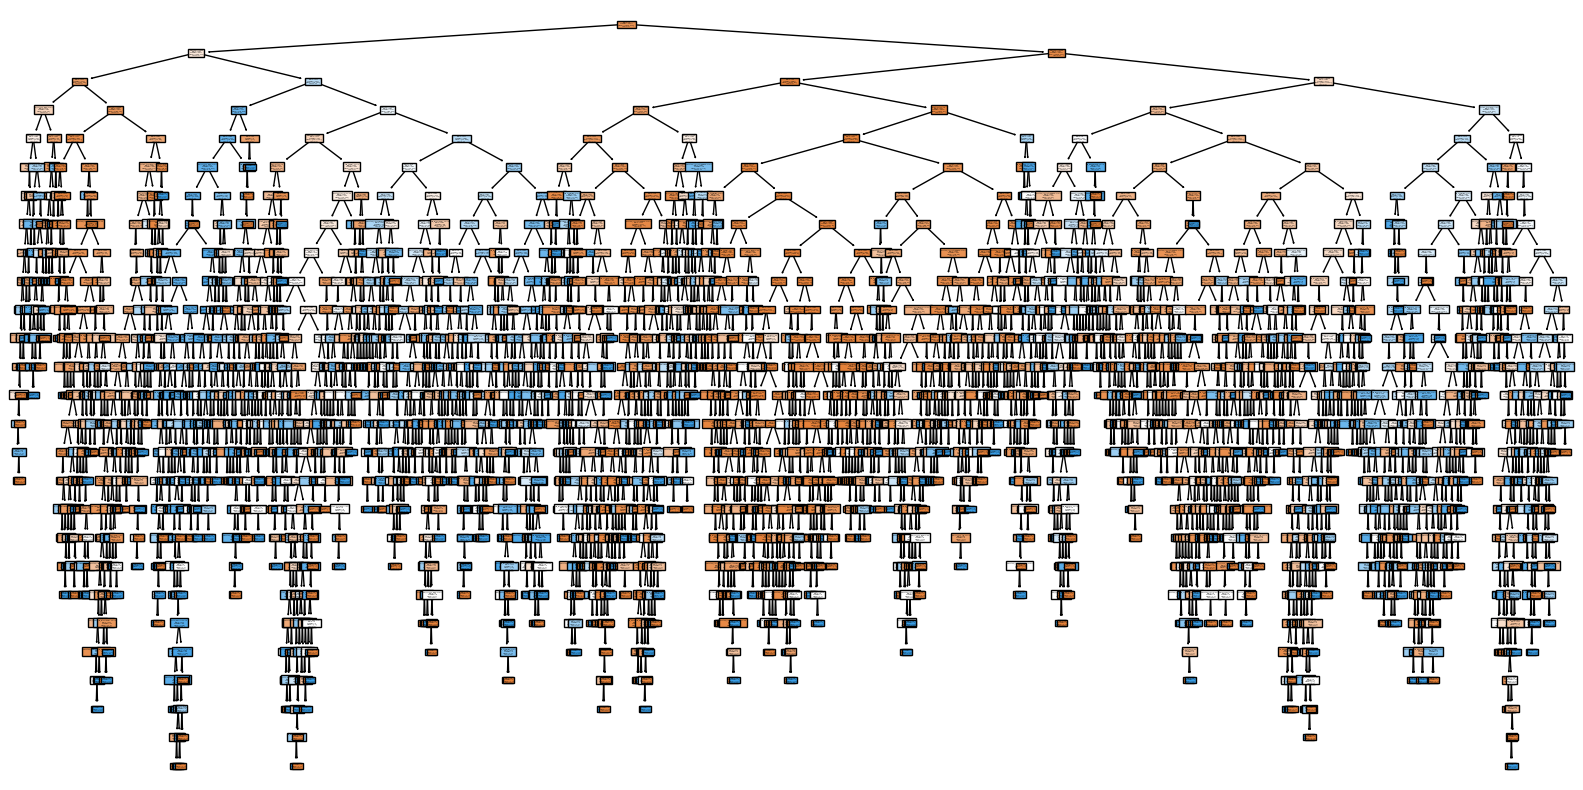

In [110]:
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

In [116]:
# Train a Tuned Decision Tree
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

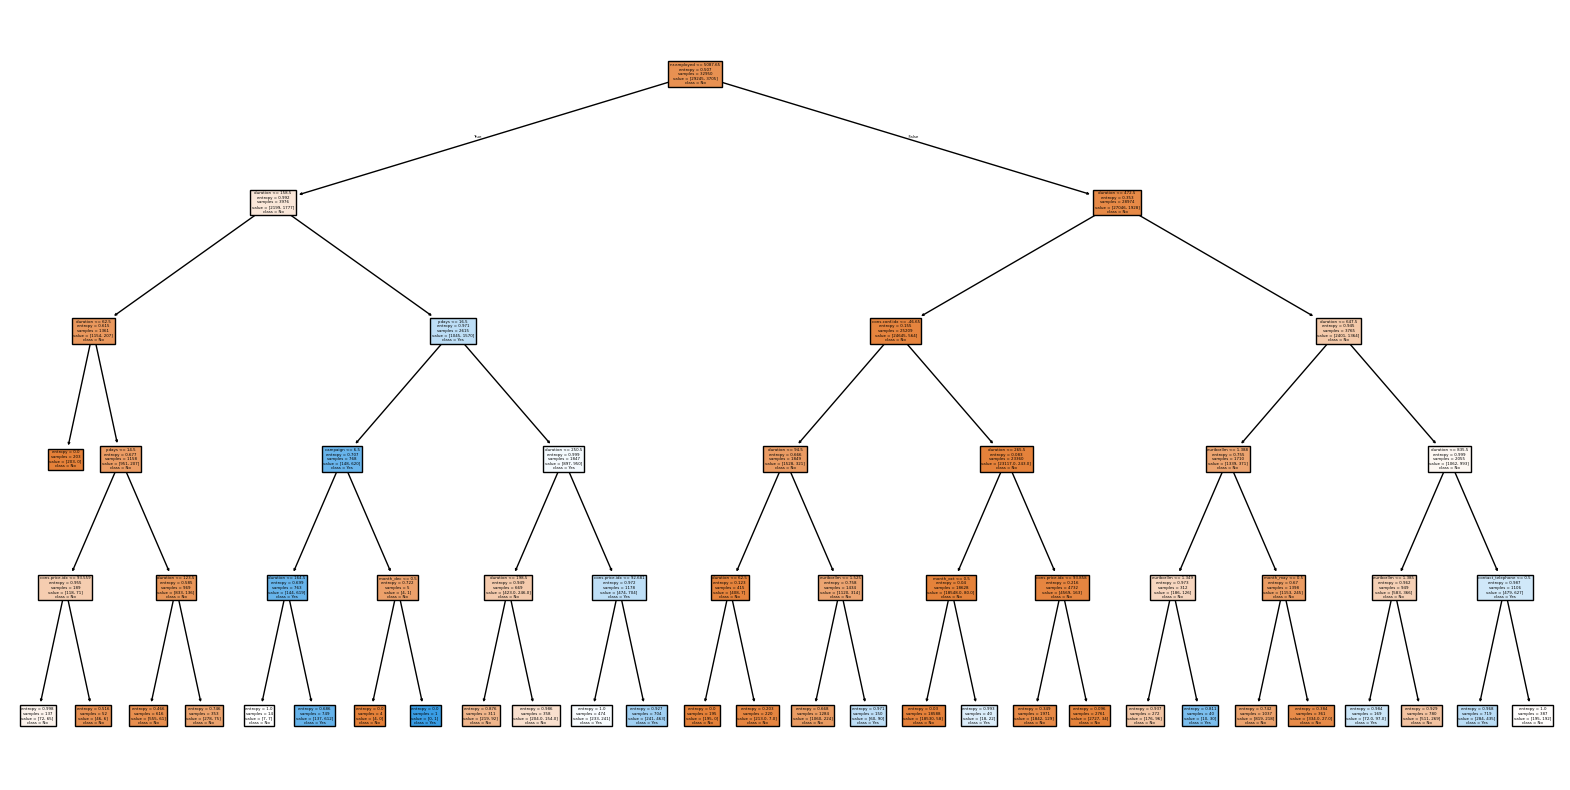

In [118]:
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

In [120]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [122]:
# Evaluate the Model
y_pred = clf.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[7054  249]
 [ 455  480]]

Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.97      0.95      7303
        True       0.66      0.51      0.58       935

    accuracy                           0.91      8238
   macro avg       0.80      0.74      0.76      8238
weighted avg       0.91      0.91      0.91      8238



In [124]:
# Split Data
X = df_encoded.drop('y_yes', axis=1) if 'y_yes' in df_encoded.columns else df_encoded.drop('y', axis=1)
y = df_encoded['y_yes'] if 'y_yes' in df_encoded.columns else LabelEncoder().fit_transform(df_encoded['y'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

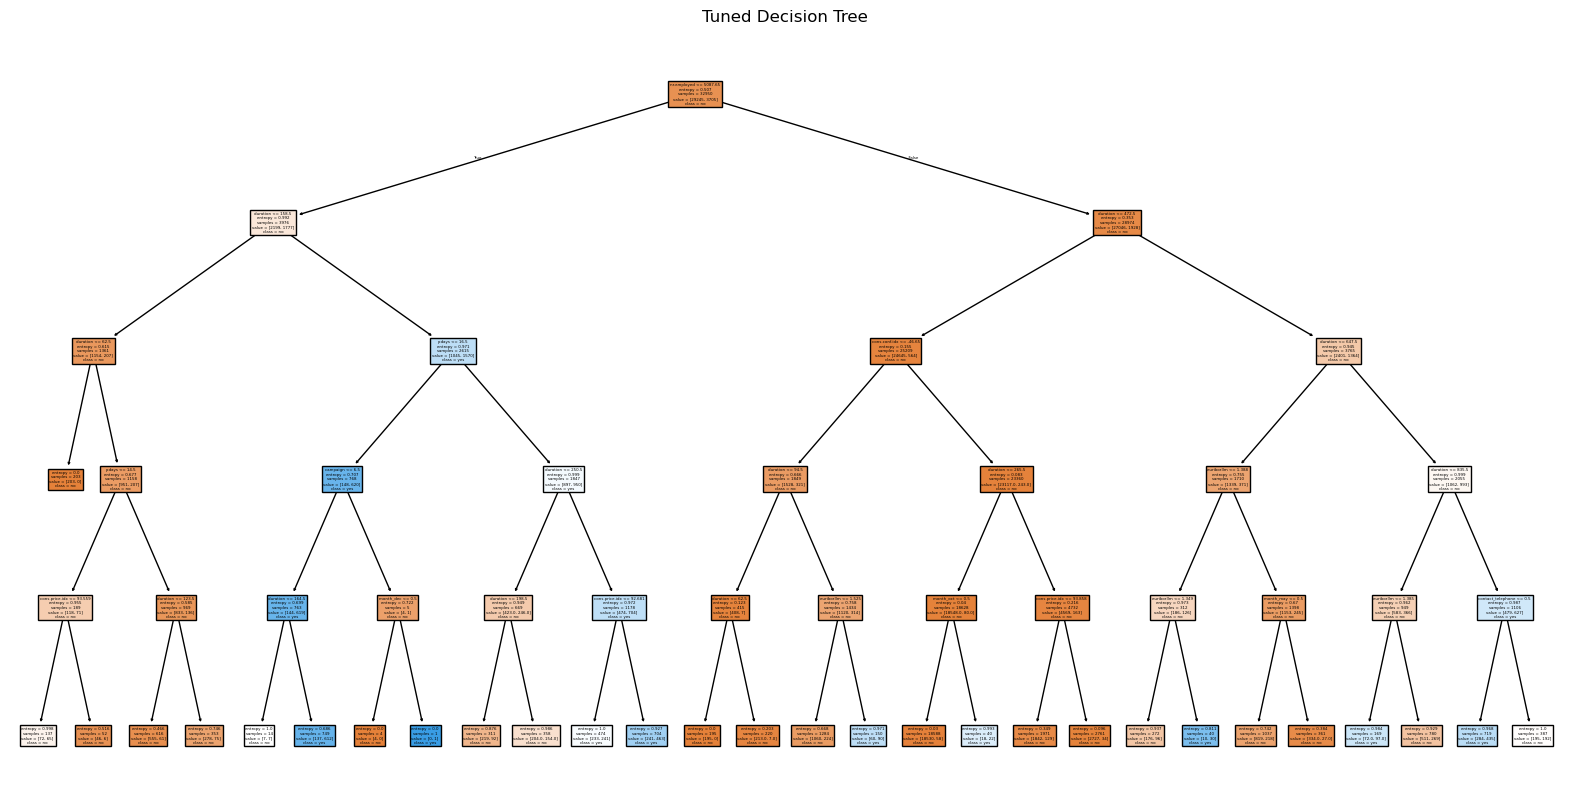

In [126]:
# Visualize Tree in Notebook
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['no', 'yes'])
plt.title("Tuned Decision Tree")
plt.show()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.289622 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.289622 to fit



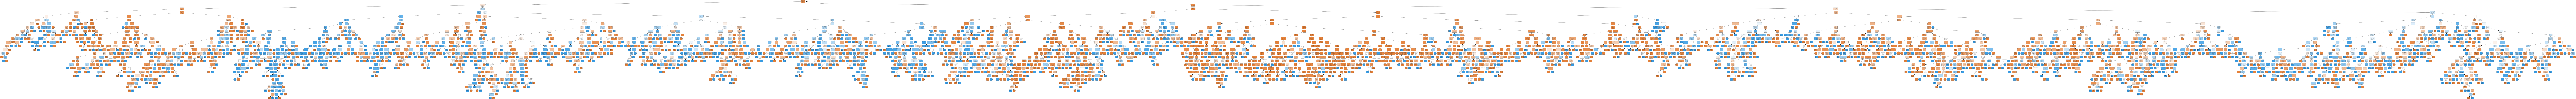

In [154]:
# Save the Tree as PNG and PDF
dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns,
                           class_names=['no', 'yes'], filled=True,
                           rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("decision_tree.png")
graph.write_pdf("decision_tree.pdf")
Image(graph.create_png())

In [128]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("bank-additional-full.csv", sep=';')

# Select features
features = ['age', 'job', 'marital', 'education', 'y']
df_small = df[features].copy()

# Encode target variable
le_y = LabelEncoder()
df_small['y'] = le_y.fit_transform(df_small['y'])  # yes=1, no=0

# One-hot encode categorical features
X = pd.get_dummies(df_small.drop('y', axis=1), drop_first=True)
y = df_small['y']

In [130]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

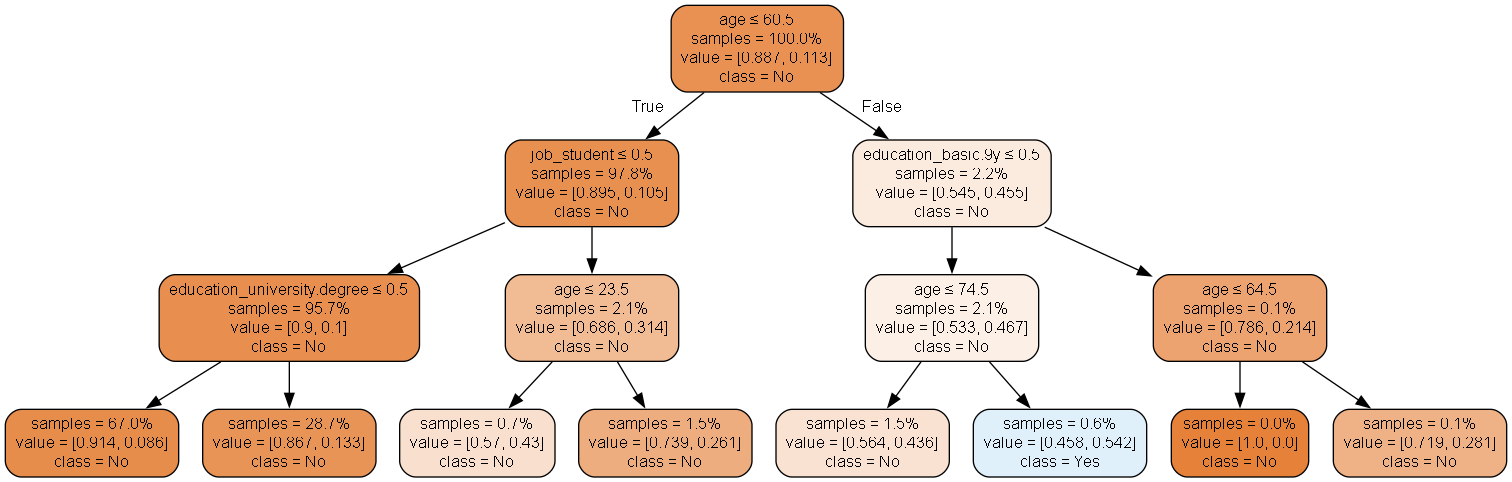

In [134]:
import graphviz
from IPython.display import Image

graph = graphviz.Source(dot_data)
graph.render("decision_tree_readable", format="png")  # Saves the image file
Image("decision_tree_readable.png")                   # Display inline

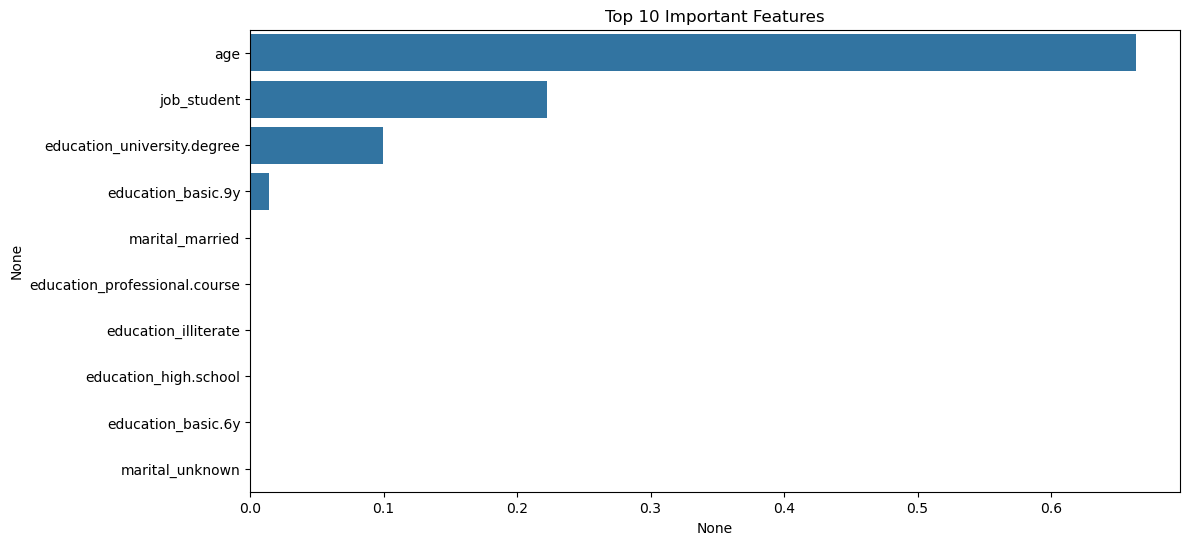

In [94]:
importances = model.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=feat_importance[:10], y=feat_importance.index[:10])
plt.title("Top 10 Important Features")
plt.show()